In [6]:
import pandas as pd
import numpy as np

users = pd.read_csv('Total.csv')
expert=pd.read_csv('Expert_NEUR2.csv')

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [8]:
class MF():
    
    def __init__(self, R, K, alpha, beta, iterations):
        """
        Perform matrix factorization to predict empty
        entries in a matrix.
        
        Arguments
        - R (ndarray)   : user-item rating matrix
        - K (int)       : number of latent dimensions
        - alpha (float) : learning rate
        - beta (float)  : regularization parameter
        """
        
        self.R = R.astype(np.float64)
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    def train(self):
        # Initialize user and item latent feature matrice
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K)).astype(np.float64)
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K)).astype(np.float64)
#         print(type(self.P[0][0]), type(self.P))
#         print(type(self.Q[0][0]), type(self.Q))
#         return
        
        # Initialize the biases
        self.b_u = np.zeros(self.num_users).astype(np.float64)
        self.b_i = np.zeros(self.num_items).astype(np.float64)
        self.b = np.mean(self.R[np.where(self.R != 0)]).astype(np.float64)
        
        # Create a list of training samples
        self.samples = [
            (i, j, self.R[i, j])
            for i in range(self.num_users)
            for j in range(self.num_items)
            if self.R[i, j] > 0
        ]
        
        # Perform stochastic gradient descent for number of iterations
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
#             if (i+1) % 10 == 0:
#                 print("Iteration: %d ; error = %.4f" % (i+1, mse))
        
        return training_process

    def mse(self):
        """
        A function to compute the total mean square error
        """
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    def sgd(self):
        """
        Perform stochastic graident descent
        """
        for i, j, r in self.samples:
            # Computer prediction and error
            prediction = self.get_rating(i, j)
            e = (r - prediction)
            
            # Update biases
            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])
            
            # Create copy of row of P since we need to update it but use older values for update on Q
            P_i = self.P[i, :][:]
            
            # Update user and item latent feature matrices
#             print(self.alpha, e, self.Q[j, :], self.beta, self.P[i,:])
            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * P_i - self.beta * self.Q[j,:])

    def get_rating(self, i, j):
        """
        Get the predicted rating of user i and item j
        """
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction
    
    def full_matrix(self):
        """
        Computer the full matrix using the resultant biases, P and Q
        """
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)


# Moderation Matrix

In [9]:
uId=np.unique(users['User_ID'])
rId=np.unique(users['Resource_ID'])

In [10]:
RQ =np.zeros((len(uId)+1,len(rId)))
for i in range(len(rId)): #len(rId)
    
    Ri=users[users.Resource_ID==rId[i]]
    for j in range(len(Ri)):
        k=np.where(uId == Ri.iloc[j]['User_ID'])[0][0]
        RQ[k][i]=Ri.iloc[j]['Decision']

# Spot Checks 

In [11]:
z=[]
for i in range(len(rId)):
        if np.any(rId[i] == expert['Resource_ID']):
            z.append(i)
print(z)
len(z)

[1, 19, 24, 26, 29, 30, 34, 37, 42, 56, 60, 61, 66, 70, 74, 77, 82, 86, 118, 119, 120, 127, 132, 140, 176, 213, 217, 218, 222, 223, 227, 234, 235, 246, 256, 282, 290, 298, 305, 310, 314, 322, 341, 349, 386, 403, 408, 427, 471, 474, 504, 514, 545, 547, 564, 610, 612, 619, 627, 632, 633, 637, 638, 639, 642, 646, 653, 656, 657, 668, 671, 676, 681, 696, 716, 719, 722, 724, 748, 754, 760, 768, 774, 776, 777, 778, 779, 782, 790, 795, 799, 803, 804, 806, 807, 809, 810, 812, 816, 817, 818, 821, 822, 823, 864, 882, 896, 913, 915, 921, 929, 936, 983, 988, 990, 991, 994, 996, 1001, 1014, 1027, 1054, 1077, 1084, 1150, 1170, 1196, 1238, 1240, 1241, 1244, 1246, 1247, 1252, 1254, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1264, 1265, 1266, 1267, 1269, 1270, 1271, 1277, 1291, 1331, 1335, 1338, 1348, 1374, 1375, 1378, 1380, 1382, 1383, 1385, 1387, 1393, 1394, 1395, 1399, 1404, 1422, 1425, 1427, 1451, 1464, 1478, 1487, 1496, 1533, 1539, 1546, 1571, 1639, 1641, 1644, 1648, 1653, 1684, 1692, 1701, 1706, 17

303

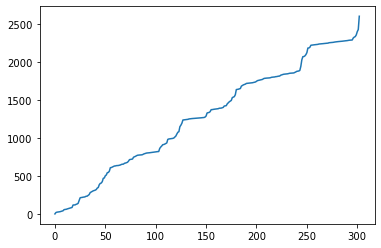

In [12]:
fig, ax = plt.subplots()
ax.plot(z)
plt.show()

# MF for expert judgment prediction

In [13]:
res=[]
ex=[]
no=[]
RQt=RQ
for i in range(len(rId)): #len(rId)
    R=[]
    if np.any(rId[i] == expert['Resource_ID']):
        R=RQt[:,0:i+1]
        mf = MF(R, K=2, alpha=0.05, beta=0.01, iterations=20)
        training_process = mf.train()
        res.append(mf.full_matrix()[len(uId)][i])
        RQt[len(uId)][i]=(expert[expert['Resource_ID']==rId[i]].Decision)
        ex.append(int(expert[expert['Resource_ID']==rId[i]].Decision))
        no.append(rId[i])

In [14]:
MF_out=pd.DataFrame({'Resource_ID': no, 'Expert': ex, 'infer':res})
MF_out.to_csv('MF_out.csv',index=False)


In [294]:
MF_out.Expert=MF_out.apply(func=lambda x:int(x['Expert']),axis=1)

In [281]:
int(expert[expert['Resource_ID']==rId[i]]['Decision'])

4

In [271]:
# np.savetxt('RQt.txt', RQt)
np.savetxt('mf.txt',mf.full_matrix())
print(no)
print(res)
print(ex)

[25120, 25912, 25944, 26051, 26236, 26360]
[4.425782093792548, 3.729991955543409, 3.3393354672715225, 3.54312209342095, 1.6418478385663735, 2.9354995512124398]
[75    4
Name: Decision, dtype: int64, 76    5
Name: Decision, dtype: int64, 0    2
Name: Decision, dtype: int64, 49    1
Name: Decision, dtype: int64, 1    4
Name: Decision, dtype: int64, 2    2
Name: Decision, dtype: int64]


In [240]:
R=RQ[:,0:4]
mf = MF(R, K=2, alpha=0.1, beta=0.01, iterations=20)
training_process = mf.train()
(mf.full_matrix()[len(uId)-1][3])

Iteration: 10 ; error = 1.6402
Iteration: 20 ; error = 0.9074


4.58171345296314

In [232]:
expert

,Resource_ID,Decision
0,25944,2
1,26236,4
2,26360,2
3,26572,4
4,26603,2
...,...,...
107,31367,5
108,31376,4
109,31616,5
110,31721,5


In [151]:
mf = MF(RQ, K=2, alpha=0.1, beta=0.01, iterations=20)
training_process = mf.train()

Iteration: 10 ; error = 27.9798
Iteration: 20 ; error = 21.8512


In [138]:
print("P x Q:")
print(mf.full_matrix())

P x Q:
[[3.91323902 4.47829839 1.90737227 ... 3.25525757 4.86735811 3.62415175]
 [3.75939233 4.39018267 1.72792071 ... 3.41130484 4.81799056 3.49817697]
 [4.03391535 4.68992009 3.51613312 ... 5.67558656 3.57999848 3.79506151]
 ...
 [3.76576239 4.36154347 1.69186167 ... 3.18377064 4.82585039 3.48927259]
 [4.21330016 4.56976171 3.17639323 ... 3.66197289 3.93120611 3.84256076]
 [3.84612185 4.2363753  2.77999119 ... 3.4343869  3.6341069  3.48958822]]


In [148]:
mf.full_matrix()[len(uId)-1][len(rId)-1]

3.489588217251056